In [474]:
!pip install numpy
!pip install pandas 
!pip install matplotlib
!pip install seaborn

In [475]:
!pip install scikit-learn

In [476]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
df_train = pd.read_csv('train.csv')

In [478]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [479]:
df_train.shape

(1460, 81)

In [480]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

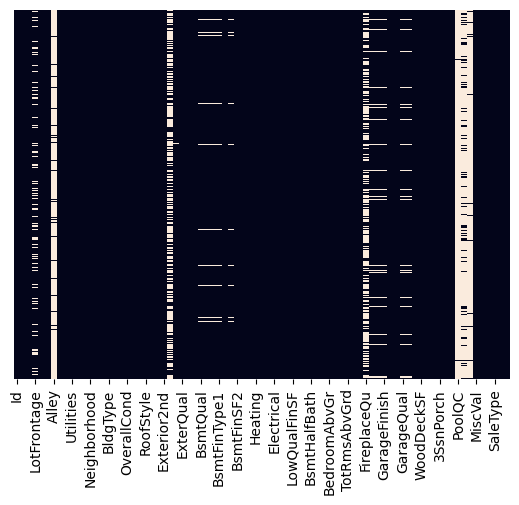

In [481]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [482]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [483]:
df_train[['Alley','LotFrontage','MasVnrType','FireplaceQu','PoolQC','MiscFeature','Fence']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Alley        91 non-null     object 
 1   LotFrontage  1201 non-null   float64
 2   MasVnrType   588 non-null    object 
 3   FireplaceQu  770 non-null    object 
 4   PoolQC       7 non-null      object 
 5   MiscFeature  54 non-null     object 
 6   Fence        281 non-null    object 
dtypes: float64(1), object(6)
memory usage: 80.0+ KB


In [484]:
!pip install ydata-profiling

In [485]:
""" from ydata_profiling import ProfileReport

Profile = ProfileReport(df_train,title ="EDA Report",explorative=True)
Profile.to_notebook_iframe()

Profile.to_file("eda report html") """

' from ydata_profiling import ProfileReport\n\nProfile = ProfileReport(df_train,title ="EDA Report",explorative=True)\nProfile.to_notebook_iframe()\n\nProfile.to_file("eda report html") '

In [486]:
df_train.drop(['Alley','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)

In [487]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [488]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna("None")

In [489]:
df_train['FireplaceQu'].value_counts()

FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64

In [490]:
df_train[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,NaN,0.0
2,BrkFace,162.0
3,NaN,0.0
4,BrkFace,350.0
...,...,...
1455,NaN,0.0
1456,Stone,119.0
1457,NaN,0.0
1458,NaN,0.0


In [491]:
print(df_train['MasVnrType'].isnull().sum(),"\n")
print(df_train['MasVnrType'].value_counts())

872 

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


In [492]:
print(df_train[['MasVnrArea','MasVnrType']].loc[df_train['MasVnrType']== 'BrkFace'].isnull().sum(),"\n")
print(df_train[['MasVnrArea','MasVnrType']].loc[df_train['MasVnrType']== 'Stone'].isnull().sum(),"\n")
print(df_train[['MasVnrArea','MasVnrType']].loc[df_train['MasVnrType']== 'BrkCmn'].isnull().sum())


MasVnrArea    0
MasVnrType    0
dtype: int64 

MasVnrArea    0
MasVnrType    0
dtype: int64 

MasVnrArea    0
MasVnrType    0
dtype: int64


In [493]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

In [494]:
print(df_train['MasVnrType'].isnull().sum())

0


Pipeline to HANDLE MISSING VALUES : The most frequent ones

In [495]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [496]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [497]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [498]:
numerical_data = df_train.select_dtypes(include='number').columns
categorical_data = df_train.select_dtypes(include='object').columns

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median'))
])

cateforical_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

full_pipeline = ColumnTransformer([
    ('num',num_pipeline, numerical_data),
    ('cat',cateforical_pipeline,categorical_data)
])

df_train_imputed = full_pipeline.fit_transform(df_train)

In [499]:
num_features = numerical_data.tolist()

encoder = full_pipeline.named_transformers_['cat'].named_steps['encoder']
cat_features = encoder.get_feature_names_out(categorical_data)

all_features = num_features + cat_features.tolist()

df_train_imputed = pd.DataFrame(df_train_imputed,columns=all_features)


In [500]:
df_train_imputed.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 276, dtype: int64

In [501]:
df_train_imputed['MiscVal'] = np.log1p(df_train_imputed['MiscVal'])

FEATURE ENGINEERING

In [502]:
df_train_imputed['TotalSF'] = df_train_imputed['TotalBsmtSF'] + df_train_imputed['1stFlrSF'] + df_train_imputed['2ndFlrSF']
df_train_imputed['Age'] = df_train_imputed['YrSold'] - df_train_imputed['YearBuilt']

In [503]:
df_train_imputed[['YearBuilt','YearRemodAdd']]

,YearBuilt,YearRemodAdd
0,2003.0,2003.0
1,1976.0,1976.0
2,2001.0,2002.0
3,1915.0,1970.0
4,2000.0,2000.0
...,...,...
1455,1999.0,2000.0
1456,1978.0,1988.0
1457,1941.0,2006.0
1458,1950.0,1996.0


In [504]:
df_train_imputed['Remodeled'] = (df_train_imputed['YearRemodAdd'] != df_train_imputed['YearBuilt']).astype(int)

In [505]:
import numpy as np

In [506]:
y_target = np.log1p(df_train_imputed['SalePrice'])

In [507]:
!pip install xgboost

In [508]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


In [509]:
df_train_imputed['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

TEST

In [510]:
df_test = pd.read_csv("test.csv")

In [511]:
df_test.drop(['Alley','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)

In [512]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna("None")

In [513]:
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

In [515]:
#numerical_data = df_test.select_dtypes(include='number').columns
#categorical_data = df_test.select_dtypes(include='object').columns

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median'))
])

cateforical_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

full_pipeline = ColumnTransformer([
    ('num',num_pipeline, numerical_data),
    ('cat',cateforical_pipeline,categorical_data)
]) 

df_test_imputed = full_pipeline.fit_transform(df_test)

In [518]:
''' 
num_features = numerical_data.tolist()

encoder = full_pipeline.named_transformers_['cat'].named_steps['encoder']
cat_features = encoder.get_feature_names_out(categorical_data)

all_features = num_features + cat_features.tolist() '''

df_test_imputed = pd.DataFrame(df_test_imputed,columns=all_features)


ValueError: Shape of passed values is (1459, 259), indices imply (1459, 276)

In [ ]:
df_test_imputed['MiscVal'] = np.log1p(df_test_imputed['MiscVal'])

In [ ]:
df_test_imputed['TotalSF'] = df_test_imputed['TotalBsmtSF'] + df_test_imputed['1stFlrSF'] + df_test_imputed['2ndFlrSF']
df_test_imputed['Age'] = df_test_imputed['YrSold'] - df_test_imputed['YearBuilt']

In [ ]:
df_test_imputed[['YearBuilt','YearRemodAdd']]

In [ ]:
df_test_imputed['Remodeled'] = (df_test_imputed['YearRemodAdd'] != df_test_imputed['YearBuilt']).astype(int)

THEN

In [ ]:
X = df_train_imputed.drop(['SalePrice'],axis=1)
y = y_target


In [ ]:
df_train_imputed.shape

In [ ]:
X.shape

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators = 1000,
    learning_rate=0.05,
    early_stopping_rounds = 50,
    eval_metric = 'rmse')

model.fit(
    x_train,y_train,
    eval_set = [(x_test,y_test)],
    verbose = False)

In [ ]:
# Get training features (X) columns
train_columns = X.columns

# Add missing columns to test set with 0 values
for col in train_columns:
    if col not in df_test.columns:
        df_test[col] = 0

# Reorder test columns to match training data
df_test = df_test[train_columns]

# Now make predictions
test_pred = model.predict(df_test)
test_prediction = np.expm1(test_pred)

In [ ]:
test_pred = model.predict(df_test_imputed)
test_prediction = np.expm1(test_pred)